# AP21110011538 || YARAM SANDEEP REDDY

###### Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)].Implement principal component analysis. Use this to obtain the feature in transformed2D feature space. Plot the scatter plot of data points in both the original as well as transformed domain.

In [3]:
import numpy as np
import pandas as pd

In [4]:
#x=[50,100,150,350,250,600,900]
#y=[500,800,1000,1400,1200,1800,1900]
n=5
x=[5,4,6,2,7]
y=[38,99,24,29,16]

In [5]:
y=np.array(y)
x=np.array(x)

In [6]:
x_s=np.sum(x)
y_s=np.sum(y)

In [7]:
x_m=x_s/n
y_m=y_s/n
print("X mean is ",x_m)
print("Y mean is ",y_m)

X mean is  4.8
Y mean is  41.2


In [8]:
x_x_m=(x-x_m)
y_y_m=(y-y_m)
print("x-x_m:",x_x_m)
print("y-y_m:",y_y_m)   
x_x_m=np.array(x-x_m)
y_y_m=np.array(y-y_m)

x-x_m: [ 0.2 -0.8  1.2 -2.8  2.2]
y-y_m: [ -3.2  57.8 -17.2 -12.2 -25.2]


In [9]:
def covariance(X, Y):    
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    cov = sum((X[i]-mean_X)*(Y[i]-mean_Y) for i in range(n))/n
    return cov

In [10]:
co_variance_matrix=[[0,0],[0,0]]

In [11]:
for i in range(2):
    for j in range(2):
        if i==j:
            if i==0:
                co_variance_matrix[i][j]=covariance(x_x_m,x_x_m)
            else:
                co_variance_matrix[i][j] = covariance(y_y_m, y_y_m)    
        elif j > i:
            co_variance_matrix[i][j]=covariance(x_x_m,y_y_m)
            co_variance_matrix[j][i]=co_variance_matrix[i][j]

In [12]:
print("co_variance_matrix")
co_variance_matrix

co_variance_matrix


[[2.96, -17.76], [-17.76, 886.1599999999999]]

In [13]:
data = np.array([x_x_m,y_y_m])
cov_matrix = np.cov(data, bias=True)
print(cov_matrix)

[[  2.96 -17.76]
 [-17.76 886.16]]


In [14]:
eigenvalues,eigenvectors=np.linalg.eig(co_variance_matrix)
sorted_indices=np.argsort(eigenvalues)[::-1]
sorted_eigenvalues=eigenvalues[sorted_indices]
sorted_eigenvectors=eigenvectors[:,sorted_indices]

In [15]:
print("Sorted Eigenvalues:",sorted_eigenvalues)
print("\nCorresponding Sorted Eigenvectors:")
sorted_eigenvectors

Sorted Eigenvalues: [886.51698614   2.60301386]

Corresponding Sorted Eigenvectors:


array([[ 0.02009651, -0.99979804],
       [-0.99979804, -0.02009651]])

In [16]:
A=np.vstack((x_x_m,y_y_m)).T
print("Normilized matrix:")
A

Normilized matrix:


array([[  0.2,  -3.2],
       [ -0.8,  57.8],
       [  1.2, -17.2],
       [ -2.8, -12.2],
       [  2.2, -25.2]])

In [17]:
B=np.vstack((x,y)).T
print("Original matrix")
B

Original matrix


array([[ 5, 38],
       [ 4, 99],
       [ 6, 24],
       [ 2, 29],
       [ 7, 16]])

In [18]:
F=np.dot(A,sorted_eigenvectors)
print("Final Matrix")
print(F)

Final Matrix
[[  3.20337305  -0.13565077]
 [-57.80440419  -0.36173994]
 [ 17.22064218  -0.85409765]
 [ 12.14126591   3.04461197]
 [ 25.23912305  -1.6931236 ]]


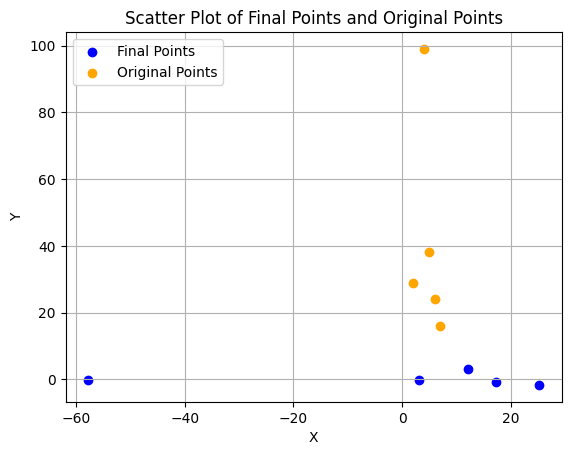

In [19]:
import matplotlib.pyplot as plt
F = np.array(F)
B = np.array(B)
plt.scatter(F[:, 0], F[:, 1], color='blue', label='Final Points')
plt.scatter(B[:, 0], B[:, 1], color='orange', label='Original Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Final Points and Original Points')
plt.grid(True)
plt.legend()
plt.show()

##### Implement Principal Component Analysis Algorithm and use it to reduce dimensionsof Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformeddomain with different colour codes for samples belonging to different classes.

In [20]:
df=pd.read_csv("iris.csv")
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
d=df.drop("Species",axis=1)
d=np.array(d)
mean=np.mean(d,axis=0)
mean

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [22]:
var_d=np.var(d,axis=0)
s_d_s=var_d**.5
s_d_s #variance and standared devation

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

In [23]:
n_o_r=(d-mean)/s_d_s
n_o_r#Normilization of the given data

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [24]:
def covariance_matrix(data):
    means=np.mean(data,axis=0)
    n=len(data)
    m=len(data[0])
    cov_matrix=np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            cov_matrix[i][j]=np.sum((data[:,i]-means[i])*(data[:,j]-means[j]))/(n - 1)
    return cov_matrix

In [25]:
C=covariance_matrix(n_o_r) # Covariance matrix

In [26]:
print(C)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [27]:
print(np.cov(n_o_r, rowvar=False)) #direct way

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [28]:
eigenvalues, eigenvectors = np.linalg.eig(C) # sorting the eign values baed on index values and sorting  
sorted_indices = np.argsort(eigenvalues)[::-1]#in the eigen values and eigen vectors
sorted_eigenvalues = eigenvalues[sorted_indices]# the sorting is doing by decending order because we max eigen values
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [29]:
print("Sorted Eigenvalues:",sorted_eigenvalues)
print("\nCorresponding Sorted Eigenvectors:",sorted_eigenvectors)

Sorted Eigenvalues: [2.93808505 0.9201649  0.14774182 0.02085386]

Corresponding Sorted Eigenvectors: [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [30]:
print(eigenvalues, eigenvectors)

[2.93808505 0.9201649  0.14774182 0.02085386] [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [31]:
top_eigenvalues = sorted_eigenvalues[:2] # we converting 4D to 2D so we are keeping only 2 top eigen vectors
top_eigenvectors = sorted_eigenvectors[:, :2]
print("Top 2 Eigenvalues:")
print(top_eigenvalues)
print("\nCorresponding Top 2 Eigenvectors:")
print(top_eigenvectors)

Top 2 Eigenvalues:
[2.93808505 0.9201649 ]

Corresponding Top 2 Eigenvectors:
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


### Final Matrix after normilization

In [32]:
F1=np.dot(n_o_r,top_eigenvectors)
print(F1)

[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]
 [-2.07563095 -1.48917752]
 [-2.44402884 -0.0476442 ]
 [-2.23284716 -0.22314807]
 [-2.33464048  1.11532768]
 [-2.18432817  0.46901356]
 [-2.1663101  -1.04369065]
 [-2.32613087 -0.13307834]
 [-2.2184509   0.72867617]
 [-2.6331007   0.96150673]
 [-2.1987406  -1.86005711]
 [-2.26221453 -2.68628449]
 [-2.2075877  -1.48360936]
 [-2.19034951 -0.48883832]
 [-1.898572   -1.40501879]
 [-2.34336905 -1.12784938]
 [-1.914323   -0.40885571]
 [-2.20701284 -0.92412143]
 [-2.7743447  -0.45834367]
 [-1.81866953 -0.08555853]
 [-2.22716331 -0.13725446]
 [-1.95184633  0.62561859]
 [-2.05115137 -0.24216355]
 [-2.16857717 -0.52714953]
 [-2.13956345 -0.31321781]
 [-2.26526149  0.3377319 ]
 [-2.14012214  0.50454069]
 [-1.83159477 -0.42369507]
 [-2.61494794 -1.79357586]
 [-2.44617739 -2.15072788]
 [-2.10997488  0.46020184]
 [-2.2078089   0.2061074 ]
 [-2.04514621 -0.66155811]
 

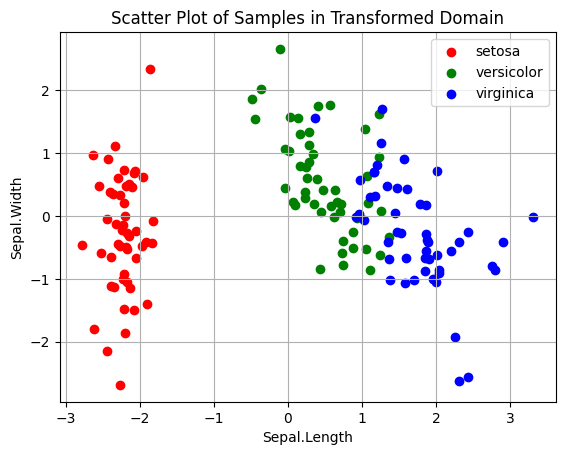

In [33]:
import numpy as np
import matplotlib.pyplot as plt
class_data=[F1[:50],F1[50:100],F1[100:150]]
class_labels=['setosa','versicolor','virginica']
class_colors = ['red','green','blue']
for i, data in enumerate(class_data):
    plt.scatter(data[:,0],data[:,1],color=class_colors[i],label=class_labels[i])
plt.xlabel('Sepal.Length')
plt.ylabel('Sepal.Width')
plt.title('Scatter Plot of Samples in Transformed Domain')
plt.legend()
plt.grid(True)
plt.show()
